# Version 1.0
# 30/11/21
Machine Learning Group Project


Adapted from file "ImportingDataV0.1.py"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rc("font", size=14)

# Checking csv and titles by importing first row of a file

In [2]:
file_dir="../SpotifyData/"
file_name="ClassicRock_3Ho3iO0iJykgEQNbjB2sic.csv"

test_csv = pd.read_csv(file_dir+file_name, index_col=0, nrows=1) 
display(test_csv)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track_name
0,0.31,0.7,9,-5.678,1,0.047,0.011,0.00965,0.0828,0.763,188.386,audio_features,08mG3Y1vljYA6bvDt4Wqkj,spotify:track:08mG3Y1vljYA6bvDt4Wqkj,https://api.spotify.com/v1/tracks/08mG3Y1vljYA...,https://api.spotify.com/v1/audio-analysis/08mG...,255493,4,Back In Black


# Compiling Data
Next step is to make a single dataframe holding the data from all source files

In [5]:
file_dir="../SpotifyData/"

file_names= ["JazzClassic_37i9dQZF1DXbITWG1ZJKYt.csv",\
             "CountryHits_1mJhSx6aYQmINsZ8dG4gzU.csv",\
             "ClassicalStudy_6wObnEPQ63a4kei1sEcMdH.csv",\
             "HipHopClassics_5CRJExGSQFYXem2hT5GFkd.csv",\
            "ClassicRock_3Ho3iO0iJykgEQNbjB2sic.csv",\
             "KpopClassics_0jB4ANR4ox65etDMnxvGLp.csv",\
             "HeavyMetalClassics_27gN69ebwiJRtXEboL12Ih.csv",\
             "DanceHits_5oKz4DsTP8zbL97UIPbqp4.csv"]

#file_nrows=[ 200, 205, 227,229, 299, 322, 385, 434]

#Sticking with just the basic parameters for now
parameter_columns = [1,2,5,6,7,8,9,10]
# tempo_column=11
# mode 5
parameter_columns = [1,2,5,6,7,8,9,10,11]



## Most convenient to set up dataframe with initial file, then systematically loop through the others
## 1 indexing here more natural
playlist_number=1
data = pd.read_csv(file_dir+file_names[playlist_number-1], usecols=parameter_columns)#, nrows=file_nrows[0])

playlist_numbers = playlist_number*np.ones(len(data))
data["playlist_number"]=playlist_numbers #Now has extra playlist column



# Now looping through the remaining filenames
for playlist_number in range(2,len(file_names)+1):
    ## dtmp := Temporary dataframe, will append to df.data once data filtered and prepped
    dtmp= pd.read_csv(file_dir+file_names[playlist_number-1], usecols=parameter_columns)
    
    ## Incase we want to use const number of songs per playlist
    #dtmp= pd.read_csv(file_dir+file_names[playlist_number-1], usecols=parameter_columns), \
    #                  nrows=200)

    playlist_numbers = playlist_number*np.ones(len(dtmp)) # array of playlist_number
    dtmp["playlist_number"]=playlist_numbers #Now has extra playlist column
    data=data.append(dtmp, ignore_index=True) #Append back to main df.data
    

    
## Removing duplicates
print("Removing n duplicates = ", data.duplicated().sum()) #prints number of duplicates
data = data.drop_duplicates() 
display(data.head())


X = data.loc[:,"danceability":"tempo"]#.values
#X = data.loc[:,"danceability":"tempo"]
Y = data.loc[:,"playlist_number"]

## Reset indexing after dropring duplicates
X.reset_index(drop=True, inplace=True)
Y.reset_index(drop=True, inplace=True)
X=np.array(X);Y=np.array(Y)
classes=np.array([1,2,3,4,5,6,7,8])

Removing n duplicates =  24


,danceability,energy,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist_number
0,0.639,0.2690,1,0.0698,0.982,0.120000,0.141,0.539,124.866,1.0
1,0.419,0.0284,1,0.0357,0.987,0.586000,0.105,0.121,71.502,1.0
2,0.573,0.2470,0,0.0627,0.713,0.000056,0.103,0.604,138.234,1.0
3,0.593,0.1030,1,0.0810,0.986,0.600000,0.120,0.443,66.283,1.0
4,0.450,0.0288,1,0.0467,0.994,0.895000,0.118,0.358,130.838,1.0


In [6]:
## Sanity checks
print(X)
print(X.shape)
print(np.array(X)[0])

[[6.39000e-01 2.69000e-01 1.00000e+00 ... 1.41000e-01 5.39000e-01
  1.24866e+02]
 [4.19000e-01 2.84000e-02 1.00000e+00 ... 1.05000e-01 1.21000e-01
  7.15020e+01]
 [5.73000e-01 2.47000e-01 0.00000e+00 ... 1.03000e-01 6.04000e-01
  1.38234e+02]
 ...
 [5.28000e-01 9.65000e-01 0.00000e+00 ... 7.97000e-02 5.87000e-01
  1.36065e+02]
 [4.58000e-01 6.96000e-01 1.00000e+00 ... 1.23000e-01 4.18000e-01
  1.74141e+02]
 [3.11000e-01 8.57000e-01 0.00000e+00 ... 3.07000e-01 3.58000e-01
  1.19960e+02]]
(2282, 9)
[6.39000e-01 2.69000e-01 1.00000e+00 6.98000e-02 9.82000e-01 1.20000e-01
 1.41000e-01 5.39000e-01 1.24866e+02]


# kNN Model

In [7]:
from sklearn.neighbors import KNeighborsClassifier

## Just training on all data
model = KNeighborsClassifier(n_neighbors=3, weights="uniform").fit(X,Y)
ypred = model.predict(X)


from sklearn.metrics import confusion_matrix
print(confusion_matrix(ypred,Y))

## Rows are true values
## Columns are predicted values
## e.g. C_(6,8) = 42 -> 42 songs in Playlist 6, predicted to be in Playlist 8

[[155  10  14   2  10   2   6   3]
 [  3 143   1  13  49  43  40  30]
 [ 32   0 212   0   1   1   0   0]
 [  3   2   1 192  18  19  16  17]
 [  6  10   0   3 176  30  47  34]
 [  1   5   0  10  11 184  20  51]
 [  0   3   0   0  20   4 245   5]
 [  0  15   0   6  14  39  12 293]]


# Precision for kNN weighted by distance

[ 3  5  7  9 11 13 15 17]
[0.4548667895120734, 0.4443390341279896, 0.4421468514466326, 0.4357945602518331, 0.43496161081039575, 0.431119556732824, 0.4281902787603582, 0.42549654017428695]
[0.008840529337722482, 0.019848641756584736, 0.017716952386486032, 0.01908839319878641, 0.019546166061105503, 0.0205148633687723, 0.020709276863830423, 0.023105258502247226]


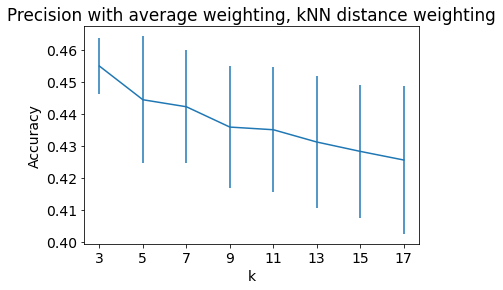

In [8]:
n_splits = 5
ks = np.arange(3,18,2)
print(ks)

from sklearn.model_selection import KFold    
from sklearn.metrics import precision_score, accuracy_score
kf = KFold(n_splits=n_splits, shuffle=True) #important to shuffle for our ordered data

tmp=[] ## Holds accuracy at each ksplit
accuracy=[]
accuracy_err=[]
for k in ks:
    model = KNeighborsClassifier(n_neighbors=k, weights="distance")
    for train, test in kf.split(X):
        model.fit(X[train],Y[train])
        ypred = model.predict(X[test])
        #print(confusion_matrix(ypred,Y[test]))

        #tmp.append( precision_score(Y[test], ypred, average="weighted") )
        tmp.append( accuracy_score(Y[test], ypred) )
        ## average = {‘micro’, ‘macro’, ‘samples’, ‘weighted’, ‘binary’}

    accuracy.append( np.array(tmp).mean() )
    accuracy_err.append( np.array(tmp).std() )

print(accuracy)
print(accuracy_err)

plt.errorbar(ks, accuracy, yerr=accuracy_err)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.xticks(ks)
plt.title("Accuracu with average weighting, kNN distance weighting")
plt.show()

# Accuracy for distance kNN weights

[0.441715612883412, 0.432080886022496, 0.4307737341164728, 0.4291277976121924, 0.4263891128258282, 0.4236072721921507, 0.4210612691466083, 0.4199761747092019]
[0.014899677332448388, 0.0175528344492145, 0.020663989761310987, 0.018679706927879923, 0.0188325746688981, 0.02219303202133305, 0.022297636644144078, 0.02299289390889852]


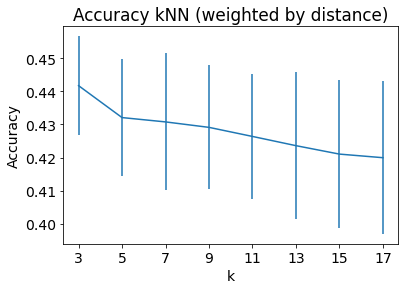

In [9]:
tmp=[]
accuracy=[]
accuracy_err=[]
for k in ks:
    model = KNeighborsClassifier(n_neighbors=k, weights="distance")
    
    accuracy_tmp=[]
    for train, test in kf.split(X):
        model.fit(X[train],Y[train])
        ypred = model.predict(X[test])
        #print(confusion_matrix(ypred,Y[test]))
        tmp.append( accuracy_score(Y[test], ypred) )
        
    accuracy.append(np.array(tmp).mean())
    accuracy_err.append(np.array(tmp).std())
    
print(accuracy)
print(accuracy_err)

plt.errorbar(ks, accuracy, yerr=accuracy_err)
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy kNN (weighted by distance)")
plt.show()

#Skeane77 — Today at 11:35

file_names= ["ClassicRock_3Ho3iO0iJykgEQNbjB2sic.csv",\
             "ClassicalStudy_6wObnEPQ63a4kei1sEcMdH.csv",\
             "CountryHits_1mJhSx6aYQmINsZ8dG4gzU.csv",\
             "DanceHits_5oKz4DsTP8zbL97UIPbqp4.csv",\
             "HeavyMetalClassics_27gN69ebwiJRtXEboL12Ih.csv",\
             "HipHopClassics_5CRJExGSQFYXem2hT5GFkd.csv",\
             "JazzClassic_37i9dQZF1DXbITWG1ZJKYt.csv",\
             "KpopClassics_0jB4ANR4ox65etDMnxvGLp.csv"]


# Most convenient to set up dataframe with initial file, then systematically loop through the others
#Sticking with just the basic parameters for now
parameter_columns = [1,2,5,6,7,8,9, 19]#19 for songnames
nrows=200



#1 indexing here more natural
playlist_number=1
data = pd.read_csv(file_dir+file_names[playlist_number-1], usecols=parameter_columns, nrows=nrows)

playlist_numbers = playlist_number*np.ones(len(data))
data["playlist_number"]=playlist_numbers #Now has extra playlist column



# Now looping through the remaining filenames
for playlist_number in range(2,len(file_names)+1):
    # dtmp := Temporary dataframe, will append to df.data once data filtered and prepped
    dtmp= pd.read_csv(file_dir+file_names[playlist_number-1], usecols=parameter_columns, nrows=nrows)

    playlist_numbers = playlist_number*np.ones(len(dtmp)) # array of playlist_number
    dtmp["playlist_number"]=playlist_numbers #Now has extra playlist column
    data=data.append(dtmp, ignore_index=True) #Append back to main df.data
    
display(data)
print(data.duplicated().sum()) #prints number of duplicates
print(data.loc[data.duplicated(),:]) #prints rowof duplicate

# Polynomial Features


0.4222253349724737
0.39197380704618257
0.38079982742744983
0.3704341887514272
0.3558879301128248


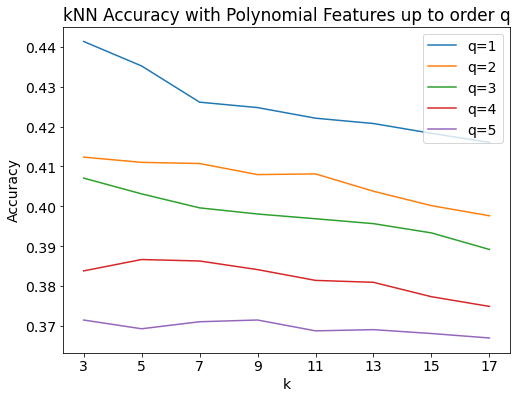

In [10]:
from sklearn.preprocessing import PolynomialFeatures
q_poly = [1,2,3,4,5]      

plt.figure(figsize=(8,6))
for q in q_poly:
    Xpoly = PolynomialFeatures(q, include_bias=False).fit_transform(X)
    tmp=[]
    accuracy=np.array([])
    accuracy_err=np.array([])
    for k in ks:
        model = KNeighborsClassifier(n_neighbors=k, weights="distance")
        for train, test in kf.split(Xpoly):
            model.fit(Xpoly[train],Y[train])
            ypred = model.predict(Xpoly[test])
            #print(confusion_matrix(ypred,Y[test]))

            tmp.append( accuracy_score(Y[test], ypred))#, average="weighted") )
            ## average = {‘micro’, ‘macro’, ‘samples’, ‘weighted’, ‘binary’}

        accuracy=np.append( accuracy, np.array(tmp).mean() )
        accuracy_err= np.append( accuracy_err, np.array(tmp).std() )

    print(max(accuracy-accuracy_err))
    #print(accuracy_err)

    """
    plt.errorbar(ks, accuracy, yerr=accuracy_err)
    plt.xlabel("k")
    plt.ylabel("accuracy")
    plt.title("Accuracy with average weighting, kNN distance weighting. Q="+ str(q))
    plt.show()
    """
    plt.plot(ks, accuracy, label="q="+str(q))
    #plt.errorbar(ks, accuracy, yerr=accuracy_err, label="q="+str(q), capsize=3)

plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend()
plt.title("kNN Accuracy with Polynomial Features up to order q")
plt.show()

# Logistic Regression

C:\Users\dylan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dylan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\dylan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dylan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[0.6529290951668011, 0.6603852355176782, 0.6122029636454375, 0.579324542208914, 0.5854514568697455]
[0.010183132075324664, 0.014480266704086999, 0.020710917625739712, 0.022926476652552034, 0.005591593848190394]


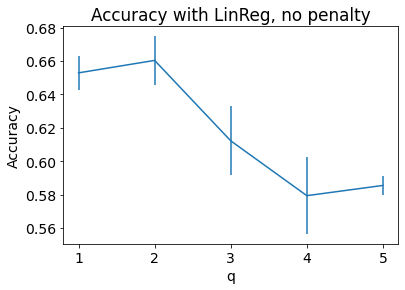

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline #Pipelining outputs->inputs 
from sklearn.preprocessing import StandardScaler #Rescale data

pipe = make_pipeline(StandardScaler(), \
                     LogisticRegression(penalty="none", max_iter=1e3))
################################

#from sklearn.preprocessing import PolynomialFeatures
q_poly = [1,2,3,4,5]      


accuracy=[]
accuracy_err=[]
for q in q_poly:
    Xpoly = PolynomialFeatures(q, include_bias=False).fit_transform(X)
    tmp=[]
    for train, test in kf.split(Xpoly):
        
        pipe.fit(Xpoly[train],Y[train])
        tmp.append( pipe.score(Xpoly[test], Y[test]))
        #ypred = pipe.predict(Xpoly[test])
        #print(confusion_matrix(ypred,Y[test]))

    accuracy.append( np.array(tmp).mean() )
    accuracy_err.append( np.array(tmp).std() )

print(accuracy)
print(accuracy_err)

plt.errorbar(q_poly, accuracy, yerr=accuracy_err)
plt.xticks(q_poly)
plt.xlabel("q")
plt.ylabel("Accuracy")
plt.title("Accuracy with LinReg, no penalty")
plt.show()

#Saving for tuning C next
accuracy_q2 = [accuracy[1], accuracy_err[1]]

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline #Pipelining outputs->inputs 
from sklearn.preprocessing import StandardScaler #Rescale data

################################

#from sklearn.preprocessing import PolynomialFeatures
#q_poly = [1,2,3,4,5]
#Cs = [0.01, 0.1, 1]
Cs = [0.001,0.01,0.1, 1, 10,100,1000]
q=2
Xpoly = PolynomialFeatures(q, include_bias=False).fit_transform(X)

accuracy=[]
accuracy_err=[]
for c in Cs:
    
    pipe = make_pipeline(StandardScaler(), \
                         LogisticRegression(penalty = "l2",C=c, solver="lbfgs", max_iter=1e3))
    
    tmp=[]
    for train, test in kf.split(Xpoly):
        pipe.fit(Xpoly[train],Y[train])
        tmp.append( pipe.score(Xpoly[test], Y[test]) )
        
    accuracy.append( np.array(tmp).mean() )
    accuracy_err.append( np.array(tmp).std() )


print(accuracy,"\n", accuracy_err)

C:\Users\dylan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dylan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[0.5753666167607202, 0.635429383085723, 0.6551307151906023, 0.6595185995623634, 0.6678432953280357, 0.658202810088679, 0.6533715305769895] 
 [0.03255204286879834, 0.030927041314368152, 0.012779002047295995, 0.014879390828160045, 0.023742474972736814, 0.017525608570449193, 0.011368538824448857]


C:\Users\dylan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.5753666167607202, 0.635429383085723, 0.6551307151906023, 0.6595185995623634, 0.6678432953280357, 0.658202810088679, 0.6533715305769895] 
 [0.03255204286879834, 0.030927041314368152, 0.012779002047295995, 0.014879390828160045, 0.023742474972736814, 0.017525608570449193, 0.011368538824448857]


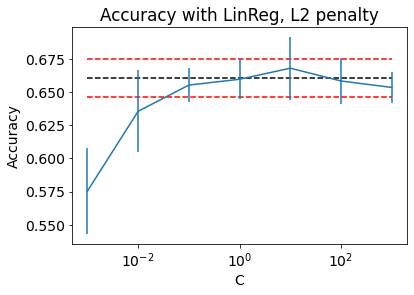

In [20]:
print(accuracy,"\n", accuracy_err)
plt.hlines( accuracy_q2[0] + accuracy_q2[1], Cs[0], Cs[-1], linestyles="dashed", color="red")#, "k--")
plt.hlines( accuracy_q2[0], Cs[0], Cs[-1], linestyles="dashed", color="black")#, "k--")
plt.hlines( accuracy_q2[0] - accuracy_q2[1], Cs[0], Cs[-1], linestyles="dashed", color="red")#, "k--")
plt.errorbar(Cs, accuracy, yerr=accuracy_err)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Accuracy with LinReg, L2 penalty")
plt.show()

#Same accuracy but smaller variance around C=10

# SVM Classification

In [26]:

def my_precision( ytrue, ypred, classes): #classes = {1,2,...,n}
    if (len(ytrue) != len(ypred) ):
        print("Error. Not same dimensions")
        
    ny = len(ypred) #number of predicitions
    nc = len(classes)
    tp = np.zeros(nc)#true positives
    
    for j in range(ny):
        if (ytrue[j]==ypred[j]):
            tp[ int(ytrue[j]-1) ]+=1
        
    return (sum(tp)/ny) #average precision
    

C:\Users\dylan\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\dylan\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\dylan\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\dylan\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\dylan\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

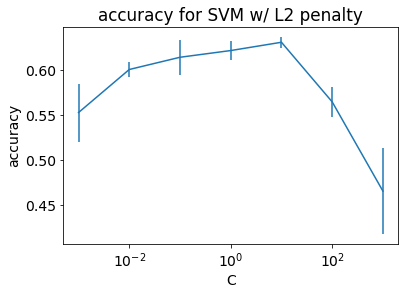

In [22]:
from sklearn.svm import LinearSVC
model = LinearSVC(C=c, max_iter=1E4)
classes=np.array([1,2,3,4,5,6,7,8])

################################

#from sklearn.preprocessing import PolynomialFeatures
q_poly = [1,2,3,4,5]
Cs = [0.001,0.01,0.1, 1, 10,100,1000]


pipe = make_pipeline(StandardScaler(), \
                     LinearSVC(C=c, max_iter=1e3))

q=3

accuracy=[]
accuracy_err=[]
for c in Cs:
    pipe = make_pipeline(StandardScaler(), \
                         LinearSVC(C=c, max_iter=1e3))
    #Xpoly = PolynomialFeatures(q, include_bias=False).fit_transform(X)
    tmp=[]
    #for train, test in kf.split(Xpoly):
    for train, test in kf.split(X):
        pipe.fit(X[train],Y[train])
        #ypred = model.predict(X[test])
        #print(confusion_matrix(ypred,Y[test]))

        #Average weighting on accuracy
        tmp.append( pipe.score(X[test], Y[test]) )

    accuracy.append( np.array(tmp).mean() )
    accuracy_err.append( np.array(tmp).std() )


plt.errorbar(Cs, accuracy, yerr=accuracy_err)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.title("accuracy for SVM w/ L2 penalty")
plt.show()

C:\Users\dylan\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\dylan\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\dylan\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\dylan\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\dylan\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

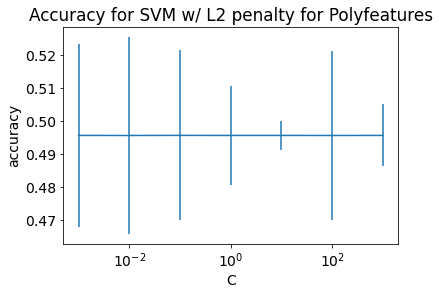

In [24]:
from sklearn.svm import LinearSVC
#model = LinearSVC(C=c, max_iter=1E3)


###################################


q_poly = [1,2,3,4,5]
Cs = [0.001,0.01,0.1, 1, 10,100,1000]
#Cs = [0.01,0.1, 1, 10]
q=3

accuracy=[]
accuracy_err=[]
for c in Cs:
    pipe = make_pipeline(StandardScaler(), \
                         LinearSVC(C=c, max_iter=1e3))
    Xpoly = PolynomialFeatures(q, include_bias=False).fit_transform(X)
    tmp=[]
    #for train, test in kf.split(Xpoly):
    for train, test in kf.split(Xpoly):
        model.fit(Xpoly[train],Y[train])
        ypred = model.predict(Xpoly[test])

        #Average weighting on accuracy
        tmp.append( pipe.score(X[test], Y[test]) )

    accuracy.append( np.array(tmp).mean() )
    accuracy_err.append( np.array(tmp).std() )


plt.errorbar(Cs, accuracy, yerr=accuracy_err)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.title("Accuracy for SVM w/ L2 penalty for Q3 Polyfeatures")
plt.show()

C:\Users\dylan\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\dylan\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\dylan\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\dylan\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\dylan\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

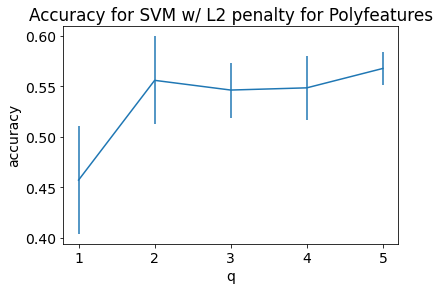

In [32]:
from sklearn.svm import LinearSVC
#model = LinearSVC(C=c, max_iter=1E3)


###################################


q_poly = [1,2,3,4,5]
C=10
model = LinearSVC(C=c, max_iter=1E3)
pipe = make_pipeline(StandardScaler(), \
                     LinearSVC(C=c, max_iter=1e3))

accuracy=[]
accuracy_err=[]
for q in q_poly:
    Xpoly = PolynomialFeatures(q, include_bias=False).fit_transform(X)
    tmp=[]
    #for train, test in kf.split(Xpoly):
    for train, test in kf.split(Xpoly):
        pipe.fit(Xpoly[train],Y[train])

        #Accuracy
        tmp.append( pipe.score(Xpoly[test], Y[test]) )

    accuracy.append( np.array(tmp).mean() )
    accuracy_err.append( np.array(tmp).std() )


plt.errorbar(q_poly, accuracy, yerr=accuracy_err)
plt.xlabel("q")
plt.ylabel("accuracy")
plt.title("Accuracy for SVM w/ L2 penalty for Polyfeatures")
plt.show()

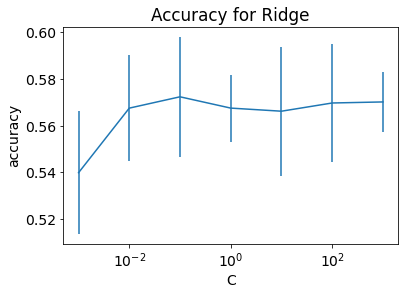

In [30]:
#from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeClassifier

################################

Cs = [0.001,0.01,0.1, 1, 10,100,1000]
#q_poly = [1,2,3,4,5]
#q=2
#Xpoly = PolynomialFeatures(q, include_bias=False).fit_transform(X)

accuracy=[]
accuracy_err=[]
for c in Cs:
    
    pipe = make_pipeline(StandardScaler(), \
        RidgeClassifier(alpha = 1/c ))
    
    tmp=[]
    for train, test in kf.split(X):
        pipe.fit(X[train],Y[train])

        #Average weighting on accuracy
        tmp.append( pipe.score(X[test], Y[test]) )

    accuracy.append( np.array(tmp).mean() )
    accuracy_err.append( np.array(tmp).std() )


plt.errorbar(Cs, accuracy, yerr=accuracy_err)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.title("Accuracy for Ridge")
plt.show()

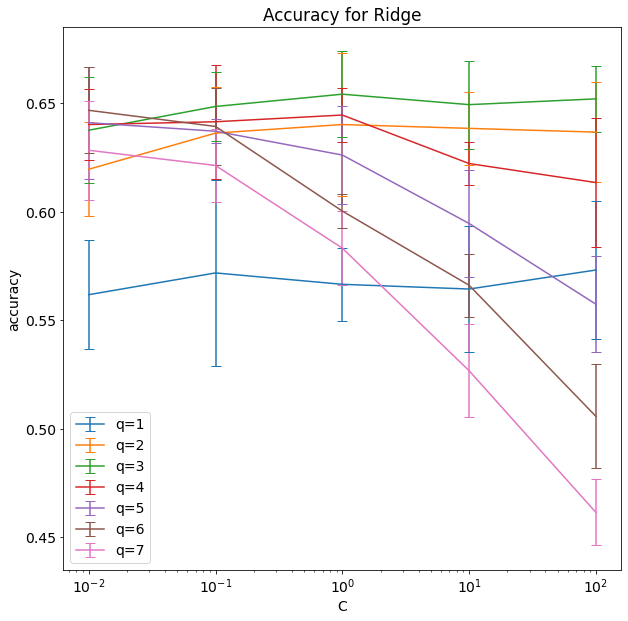

In [38]:
#from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeClassifier

################################

Cs = [0.01,0.1, 1, 10,100]
#Cs = [0.001,0.01,0.1, 1, 10,100,1000]
q_poly = [1,2,3,4,5,6,7]
#q=2
#Xpoly = PolynomialFeatures(q, include_bias=False).fit_transform(X)
plt.figure(figsize=(10,10))

for q in q_poly:
    Xpoly = PolynomialFeatures(q, include_bias=False).fit_transform(X)

    accuracy=[]
    accuracy_err=[]
    for c in Cs:
        pipe = make_pipeline(StandardScaler(), \
            RidgeClassifier(alpha = 1/c ))

        tmp=[]
        for train, test in kf.split(Xpoly):
            pipe.fit(Xpoly[train],Y[train])

            #Average weighting on accuracy
            tmp.append( pipe.score(Xpoly[test], Y[test]) )

        accuracy.append( np.array(tmp).mean() )
        accuracy_err.append( np.array(tmp).std() )


    plt.errorbar(Cs, accuracy, yerr=accuracy_err, label="q="+str(q), capsize=5)
    
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.title("Accuracy for Ridge")
plt.legend()
    
plt.show()

In [39]:
#Checkout behaviour of regression from notes or old assignments